In [80]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [81]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.keras'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set num of classes

In [82]:
NUM_CLASSES = 26

# Read dataset

In [83]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [84]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Build model

In [86]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [87]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dropout_10 (Dropout)            │ (None, 42)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 20)             │           860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 20)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 26)             │           286 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,356 (5.30 KB)

 Trainable params: 1,356 (5.30 KB)

 Non-trainable params: 0 (0.00 B)

In [88]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [89]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Train model

In [90]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.0234 - loss: 3.3375
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 74ms/step - accuracy: 0.0285 - loss: 3.3168 - val_accuracy: 0.0000e+00 - val_loss: 3.2674
Epoch 2/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0312 - loss: 3.2800
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.0215 - loss: 3.2807 - val_accuracy: 0.0000e+00 - val_loss: 3.2585
Epoch 3/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.0547 - loss: 3.2597
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.keras
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.0417 - loss: 3.2583 - val_accuracy: 0.0000e+00 - val_loss: 3.2498
Epoch 4/1000
1/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.0547 - loss: 3.2708
Epoch 4: saving model to model/keypoint_classifier/keypoint_classifier.keras


In [91]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8663 - loss: 0.6260


In [92]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [93]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
[7.7287662e-03 7.8038536e-02 3.9057686e-05 8.8786772e-03 2.9412729e-01
 1.8713535e-03 2.9271537e-06 2.4656899e-07 1.4807831e-01 1.1176260e-01
 7.9612091e-06 5.1253323e-07 1.1053811e-01 1.4999639e-02 9.0981118e-02
 6.9909092e-09 8.5986414e-08 1.1001534e-03 8.1831753e-02 4.5334723e-02
 6.2471326e-04 1.5667425e-05 2.4125932e-03 2.7319837e-05 1.5969925e-03
 9.5633811e-07]
4


# Confusion matrix

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


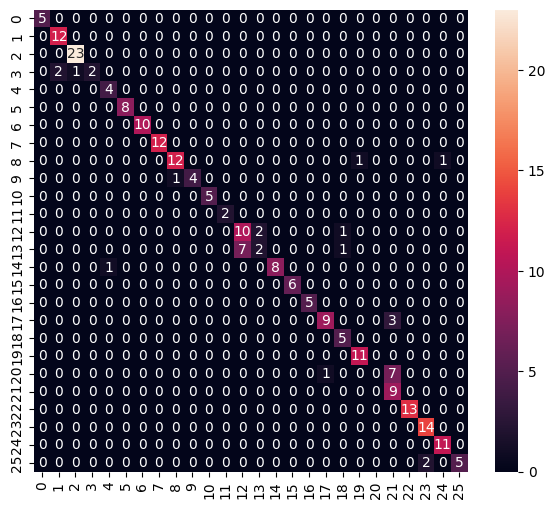

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         5
           1       0.86      1.00      0.92        12
           2       0.96      1.00      0.98        23
           3       1.00      0.40      0.57         5
           4       0.80      1.00      0.89         4
           5       1.00      1.00      1.00         8
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        12
           8       0.92      0.86      0.89        14
           9       1.00      0.80      0.89         5
          10       1.00      1.00      1.00         5
          11       1.00      1.00      1.00         2
          12       0.59      0.77      0.67        13
          13       0.50      0.20      0.29        10
          14       1.00      0.89      0.94         9
          15       1.00      1.00      1.00         6
          16       1.00      1.00      1.00         5
     

c:\Users\endpl\anaconda3\envs\asl_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\endpl\anaconda3\envs\asl_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\endpl\anaconda3\envs\asl_env\lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [94]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model (for Tensorflow-Lite)

In [95]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

In [96]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\endpl\AppData\Local\Temp\tmpvqxejxcs\assets


INFO:tensorflow:Assets written to: C:\Users\endpl\AppData\Local\Temp\tmpvqxejxcs\assets


Saved artifact at 'C:\Users\endpl\AppData\Local\Temp\tmpvqxejxcs'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 42), dtype=tf.float32, name='input_layer_5')
Output Type:
  TensorSpec(shape=(None, 26), dtype=tf.float32, name=None)
Captures:
  2398141198432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2398141193680: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2398141201424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2398158613040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2398158613744: TensorSpec(shape=(), dtype=tf.resource, name=None)
  2398158608112: TensorSpec(shape=(), dtype=tf.resource, name=None)


7540

# Inference test

In [97]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

c:\Users\endpl\anaconda3\envs\asl_env\lib\site-packages\tensorflow\lite\python\interpreter.py:457: UserWarning:     Warning: tf.lite.Interpreter is deprecated and is scheduled for deletion in
    TF 2.20. Please use the LiteRT interpreter from the ai_edge_litert package.
    See the [migration guide](https://ai.google.dev/edge/litert/migration)
    for details.
    
  warnings.warn(_INTERPRETER_DELETION_WARNING)


In [98]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [99]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [100]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 2 ms


In [101]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[7.7287643e-03 7.8038447e-02 3.9057788e-05 8.8786781e-03 2.9412723e-01
 1.8713521e-03 2.9271587e-06 2.4656961e-07 1.4807837e-01 1.1176269e-01
 7.9612064e-06 5.1253312e-07 1.1053805e-01 1.4999642e-02 9.0981111e-02
 6.9909074e-09 8.5986393e-08 1.1001511e-03 8.1831761e-02 4.5334734e-02
 6.2471244e-04 1.5667405e-05 2.4125858e-03 2.7319806e-05 1.5969946e-03
 9.5633879e-07]
4
